محاسبه مساحت و درصد کلاس‌ها برای هر سال

In [14]:
import rasterio
import numpy as np
import pandas as pd
import os

# تنظیمات مسیر و داده‌ها
base_path = r"E:\master_1\Msc_4032\spatial_processing\TA\AGIS_HW04_sarhadifaraz_spring2025\classified"
years = [1990, 2000, 2009, 2020, 2024]
classes = [0, 1, 2, 3]
class_names = ["Urban", "Agriculture", "water", "Vegetation"]
pixel_area_km2 = (30 * 30) / 1e6  # 0.0009 km² برای هر پیکسل

# نتایج نهایی
all_stats = []

for year in years:
    file_path = os.path.join(base_path, f"classified{year}.tif")

    with rasterio.open(file_path) as src:
        raster = src.read(1)
        nodata = src.nodata

    valid_pixels = raster[raster != nodata]
    total_pixels = len(valid_pixels)
    total_area = total_pixels * pixel_area_km2

    stats = {"Year": year}
    for cls, name in zip(classes, class_names):
        count = np.sum(valid_pixels == cls)
        area = count * pixel_area_km2
        percent = (area / total_area) * 100
        stats[f"{name}_Area_km2"] = round(area, 2)
        stats[f"{name}_Percent"] = round(percent, 2)

    all_stats.append(stats)

# تبدیل به DataFrame و نمایش
df = pd.DataFrame(all_stats)
print("\n📊 مساحت و درصد پوشش/کاربری زمین برای هر سال:\n")
print(df.to_string(index=False))



📊 مساحت و درصد پوشش/کاربری زمین برای هر سال:

 Year  Urban_Area_km2  Urban_Percent  Agriculture_Area_km2  Agriculture_Percent  water_Area_km2  water_Percent  Vegetation_Area_km2  Vegetation_Percent
 1990          982.67          87.82                 73.38                 6.56            4.63           0.41                58.24                5.20
 2000          982.90          87.85                 79.43                 7.10           41.06           3.67                15.51                1.39
 2009          924.80          82.65                157.76                14.10           11.04           0.99                25.31                2.26
 2020          971.26          86.80                116.38                10.40           12.41           1.11                18.86                1.69
 2024          939.27          83.95                156.68                14.00            6.58           0.59                16.37                1.46



📅 Year: 1990
Confusion Matrix:
 [[13  0  0  0]
 [12  5  0  2]
 [ 0  1  5  2]
 [ 0  5  5  8]]
Overall Accuracy: 0.534
Kappa Coefficient: 0.382
Class 0 → User's Acc: 0.52, Producer's Acc: 1.00
Class 1 → User's Acc: 0.45, Producer's Acc: 0.26
Class 2 → User's Acc: 0.50, Producer's Acc: 0.62
Class 3 → User's Acc: 0.67, Producer's Acc: 0.44


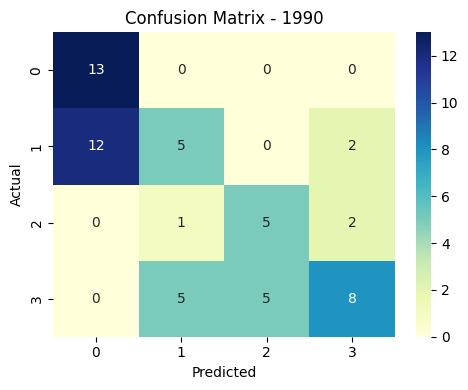


📅 Year: 2000
Confusion Matrix:
 [[35  0  4  0]
 [ 0 14  1  3]
 [ 0  0 11  4]
 [ 0  0  1 14]]
Overall Accuracy: 0.851
Kappa Coefficient: 0.790
Class 0 → User's Acc: 1.00, Producer's Acc: 0.90
Class 1 → User's Acc: 1.00, Producer's Acc: 0.78
Class 2 → User's Acc: 0.65, Producer's Acc: 0.73
Class 3 → User's Acc: 0.67, Producer's Acc: 0.93


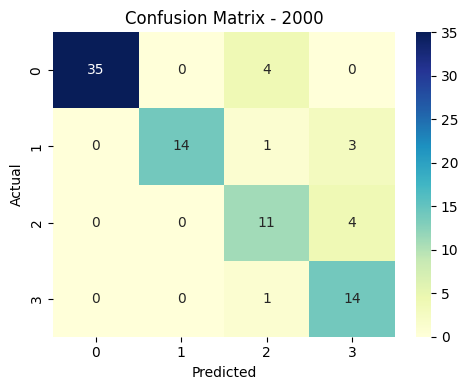


📅 Year: 2010
Confusion Matrix:
 [[26  1  0  0]
 [ 0 16  0  4]
 [ 0  0  7  2]
 [ 0  4  1 10]]
Overall Accuracy: 0.831
Kappa Coefficient: 0.764
Class 0 → User's Acc: 1.00, Producer's Acc: 0.96
Class 1 → User's Acc: 0.76, Producer's Acc: 0.80
Class 2 → User's Acc: 0.88, Producer's Acc: 0.78
Class 3 → User's Acc: 0.62, Producer's Acc: 0.67


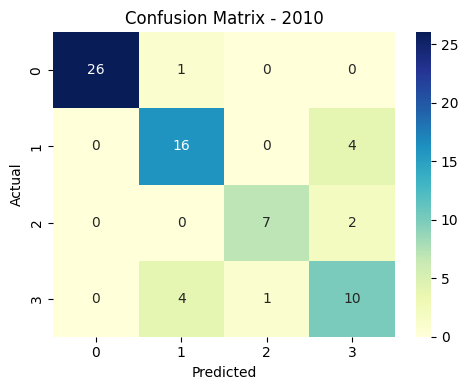


📅 Year: 2020
Confusion Matrix:
 [[29  0  0  1]
 [ 0 18  2  3]
 [ 0  2  5  4]
 [ 0  1  0 14]]
Overall Accuracy: 0.835
Kappa Coefficient: 0.771
Class 0 → User's Acc: 1.00, Producer's Acc: 0.97
Class 1 → User's Acc: 0.86, Producer's Acc: 0.78
Class 2 → User's Acc: 0.71, Producer's Acc: 0.45
Class 3 → User's Acc: 0.64, Producer's Acc: 0.93


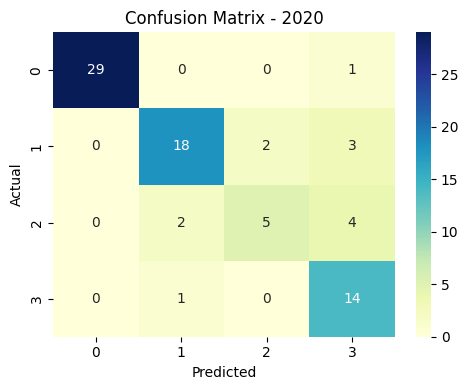


📅 Year: 2024
Confusion Matrix:
 [[29  3  0  0]
 [ 0 26  2  1]
 [ 0  1  9  2]
 [ 0  0  1 12]]
Overall Accuracy: 0.884
Kappa Coefficient: 0.836
Class 0 → User's Acc: 1.00, Producer's Acc: 0.91
Class 1 → User's Acc: 0.87, Producer's Acc: 0.90
Class 2 → User's Acc: 0.75, Producer's Acc: 0.75
Class 3 → User's Acc: 0.80, Producer's Acc: 0.92


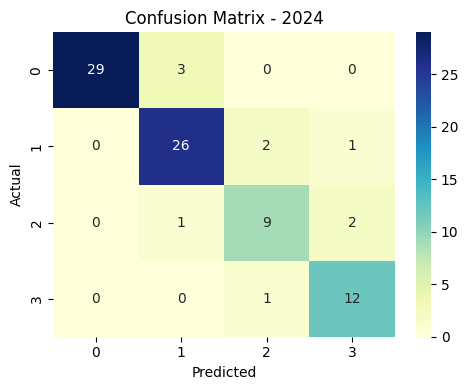

In [2]:
import geopandas as gpd
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# تعریف تابع ارزیابی
def evaluate_classification(shapefile_path, year, class_labels):
    gdf = gpd.read_file(shapefile_path)

    if 'class' not in gdf.columns or 'RASTERVALU' not in gdf.columns:
        print(f"⛔ فایل {shapefile_path} فاقد ستون‌های مورد نیاز است.")
        return None
    
    df = gdf[['class', 'RASTERVALU']].copy()
    df.columns = ['true', 'pred']

    cm = confusion_matrix(df['true'], df['pred'], labels=class_labels)
    overall_acc = accuracy_score(df['true'], df['pred'])
    kappa = cohen_kappa_score(df['true'], df['pred'])
    user_acc = np.diag(cm) / np.sum(cm, axis=0)
    producer_acc = np.diag(cm) / np.sum(cm, axis=1)

    print(f"\n📅 Year: {year}")
    print("Confusion Matrix:\n", cm)
    print(f"Overall Accuracy: {overall_acc:.3f}")
    print(f"Kappa Coefficient: {kappa:.3f}")

    for i, label in enumerate(class_labels):
        print(f"Class {label} → User's Acc: {user_acc[i]:.2f}, Producer's Acc: {producer_acc[i]:.2f}")

    # رسم Confusion Matrix
    df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)
    plt.figure(figsize=(5, 4))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f"Confusion Matrix - {year}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# مسیر پوشه اصلی
base_path = r"E:\master_1\Msc_4032\spatial_processing\TA\AGIS_HW04_sarhadifaraz_spring2025\Extractions"

# سال‌ها و نام فایل‌ها
year_files = {
    1990: "Extract1990.shp",
    2000: "Extract2000.shp",
    2010: "Extract2010.shp",
    2020: "Extraction2020.shp",
    2024: "Extraction2024.shp"
}

# لیست کلاس‌ها (تغییر بده اگر کلاس‌های بیشتری داری)
class_labels = [0, 1, 2, 3]

# اجرای تحلیل برای همه سال‌ها
for year, filename in year_files.items():
    shp_path = os.path.join(base_path, filename)
    evaluate_classification(shp_path, year, class_labels)



📊 Confusion Matrix:
[[969315  64312   3373   6630]
 [120594  40628   5868   7002]
 [  2892   1843   1525   1056]
 [  6957   6288   1685   3257]]

✅ Overall Accuracy: 0.816
✅ Kappa Coefficient: 0.248


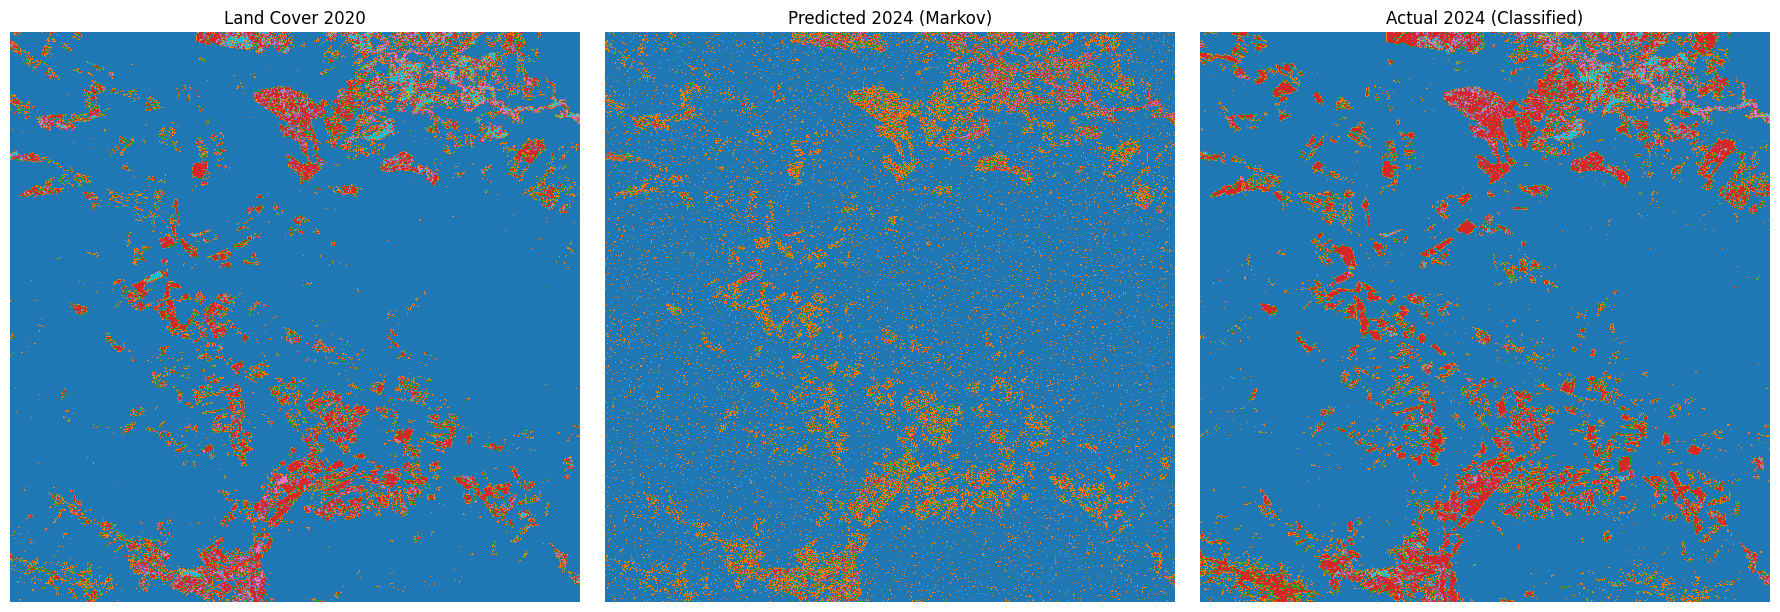

In [19]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score
import os

# مسیر فایل‌ها
base_path = r"E:\master_1\Msc_4032\spatial_processing\TA\AGIS_HW04_sarhadifaraz_spring2025\classified"
r2009 = os.path.join(base_path, "classified2009.tif")
r2020 = os.path.join(base_path, "classified2020.tif")
r2024 = os.path.join(base_path, "classified2024.tif")  # نقشه واقعی برای مقایسه
classes = [0, 1, 2, 3]

# بارگذاری رسترها
with rasterio.open(r2009) as src1:
    data_2009 = src1.read(1)
    nodata_2009 = src1.nodata

with rasterio.open(r2020) as src2:
    data_2020 = src2.read(1)
    nodata_2020 = src2.nodata
    meta = src2.meta.copy()  # برای ذخیره نقشه پیش‌بینی‌شده

with rasterio.open(r2024) as src3:
    data_2024 = src3.read(1)
    nodata_2024 = src3.nodata

# ساخت ماتریس گذار مارکوف
mask = (data_2009 != nodata_2009) & (data_2020 != nodata_2020)
early = data_2009[mask].flatten()
late = data_2020[mask].flatten()

trans_matrix = confusion_matrix(early, late, labels=classes)
trans_prob = trans_matrix.astype(float) / trans_matrix.sum(axis=1, keepdims=True)

# پیش‌بینی نقشه 2024 بر پایه نقشه 2020
np.random.seed(42)
rows, cols = data_2020.shape
predicted_2024 = np.zeros_like(data_2020, dtype=np.uint8)

for i in range(rows):
    for j in range(cols):
        c = data_2020[i, j]
        if c in classes:
            predicted_2024[i, j] = np.random.choice(classes, p=trans_prob[c])
        else:
            predicted_2024[i, j] = 255  # nodata

# ذخیره نقشه پیش‌بینی‌شده
out_path = os.path.join(base_path, "predicted2024.tif")
meta.update({"dtype": "uint8", "count": 1})
with rasterio.open(out_path, "w", **meta) as dst:
    dst.write(predicted_2024, 1)

# مقایسه با نقشه واقعی 2024
mask_compare = (predicted_2024 != 255) & (data_2024 != nodata_2024)
true = data_2024[mask_compare].flatten()
pred = predicted_2024[mask_compare].flatten()

cm = confusion_matrix(true, pred, labels=classes)
acc = accuracy_score(true, pred)
kappa = cohen_kappa_score(true, pred)

print("\n📊 Confusion Matrix:")
print(cm)
print(f"\n✅ Overall Accuracy: {acc:.3f}")
print(f"✅ Kappa Coefficient: {kappa:.3f}")

# نمایش نقشه‌ها
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(data_2020, cmap="tab10")
axs[0].set_title("Land Cover 2020")
axs[0].axis("off")

axs[1].imshow(predicted_2024, cmap="tab10")
axs[1].set_title("Predicted 2024 (Markov)")
axs[1].axis("off")

axs[2].imshow(data_2024, cmap="tab10")
axs[2].set_title("Actual 2024 (Classified)")
axs[2].axis("off")

plt.tight_layout()
plt.show()


📊 Transition Count Matrix:
 [[3982339  258919   31104   18326]
 [ 189505  243174   15617   26089]
 [  27231   21970   18832    8787]
 [  43392   42886   13444   31285]]

📈 Transition Probability Matrix (Markov):
 [[0.928 0.06  0.007 0.004]
 [0.399 0.513 0.033 0.055]
 [0.354 0.286 0.245 0.114]
 [0.331 0.327 0.103 0.239]]

📅 Predicted Class Distribution for 2030:
Class 0 → 0.842 (84.2%)
Class 1 → 0.129 (12.9%)
Class 2 → 0.014 (1.4%)
Class 3 → 0.015 (1.5%)


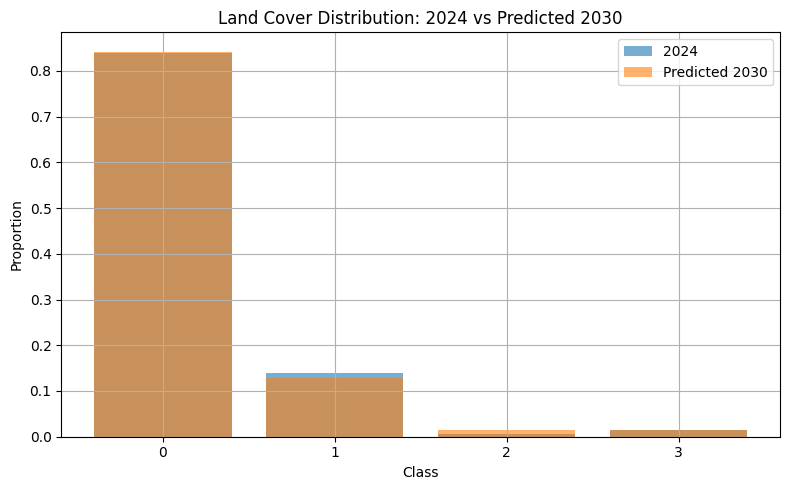

In [7]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import os

# ---------------------------
# 1. بارگذاری رسترهای 5 سال
# ---------------------------
base_path = r"E:\master_1\Msc_4032\spatial_processing\TA\AGIS_HW04_sarhadifaraz_spring2025\classified"
years = [1990, 2000, 2009, 2020, 2024]
classes = [0, 1, 2, 3]

rasters = {}
nodatas = {}

for year in years:
    file_path = os.path.join(base_path, f"classfied{year}.tif")
    with rasterio.open(file_path) as src:
        rasters[year] = src.read(1)
        nodatas[year] = src.nodata

# ---------------------------
# 2. جمع‌آوری داده‌ها برای ساخت ماتریس گذار
# ---------------------------
all_early = []
all_late = []

for i in range(len(years) - 1):
    early = rasters[years[i]]
    late = rasters[years[i + 1]]
    mask = (early != nodatas[years[i]]) & (late != nodatas[years[i + 1]])
    all_early.extend(early[mask].flatten())
    all_late.extend(late[mask].flatten())

# ---------------------------
# 3. ساخت ماتریس گذار مارکوف
# ---------------------------
trans_matrix = confusion_matrix(all_early, all_late, labels=classes)
print("📊 Transition Count Matrix:\n", trans_matrix)

trans_prob = trans_matrix.astype(float) / trans_matrix.sum(axis=1, keepdims=True)
print("\n📈 Transition Probability Matrix (Markov):\n", np.round(trans_prob, 3))

# ---------------------------
# 4. بردار توزیع سال آخر (2024)
# ---------------------------
latest = rasters[2024]
latest_flat = latest.flatten()
unique, counts = np.unique(latest_flat, return_counts=True)
current_vector = np.zeros(len(classes))

for i, cls in enumerate(classes):
    current_vector[i] = counts[unique.tolist().index(cls)] if cls in unique else 0

current_vector = current_vector / current_vector.sum()

# ---------------------------
# 5. پیش‌بینی توزیع در سال 2030
# ---------------------------
future_vector = np.dot(current_vector, trans_prob)

print("\n📅 Predicted Class Distribution for 2030:")
for i, prob in enumerate(future_vector):
    print(f"Class {classes[i]} → {prob:.3f} ({(prob * 100):.1f}%)")

# ---------------------------
# 6. رسم نمودار مقایسه‌ای
# ---------------------------
plt.figure(figsize=(8, 5))
x = [str(c) for c in classes]
plt.bar(x, current_vector, alpha=0.6, label="2024")
plt.bar(x, future_vector, alpha=0.6, label="Predicted 2030")
plt.title("Land Cover Distribution: 2024 vs Predicted 2030")
plt.xlabel("Class")
plt.ylabel("Proportion")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


پیش‌بینی نقشه 2030 + تحلیل تغییرات نسبت به 2024


📊 Change Statistics:

         Class  Pixels_2024  Pixels_2030  Change (%)
0        Urban      1043630      1046416    0.266953
1   Vegetation       174092       160945   -7.551754
2  Agriculture         7316        16660  127.720066
3       Forest        18187        19204    5.591906

🌀 Total changed pixels: 179390 (14.43%)


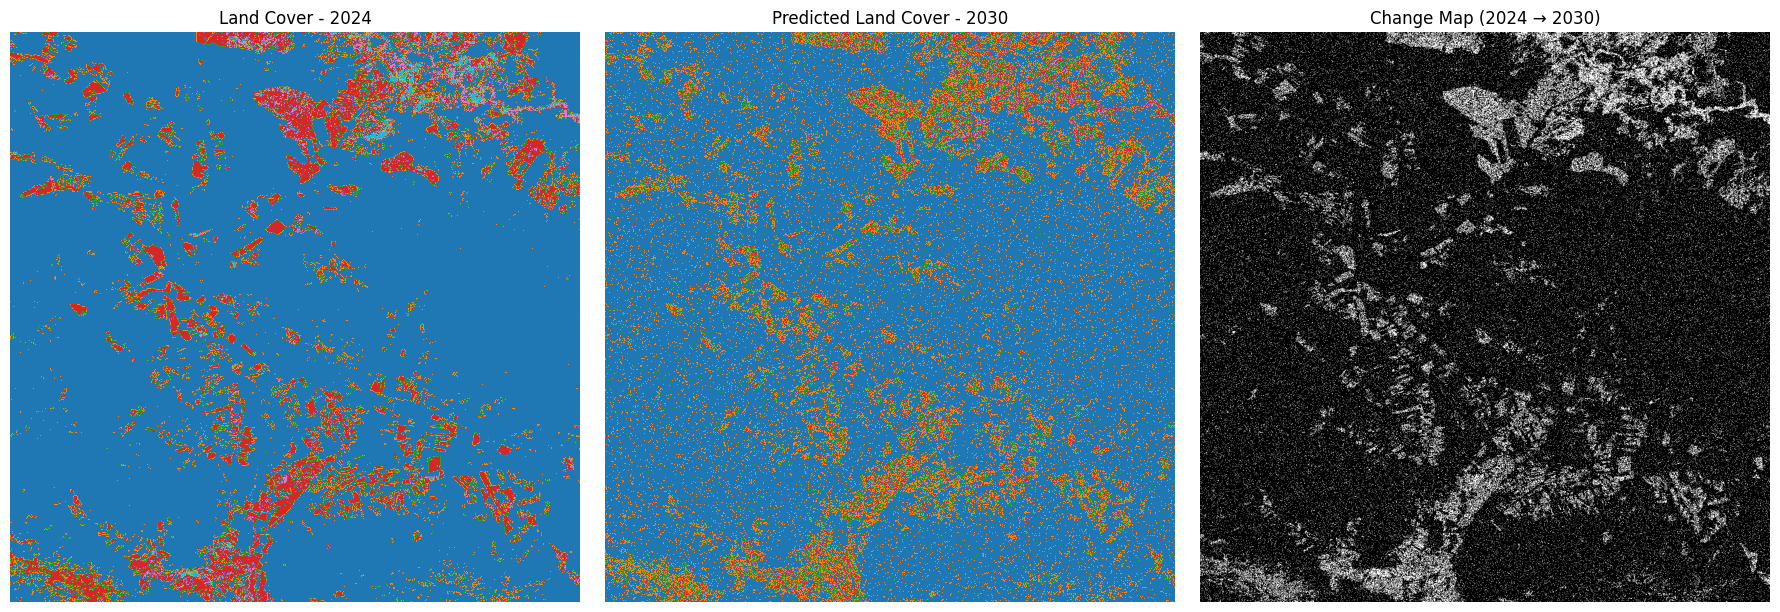

In [11]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.metrics import confusion_matrix

# ---------------------------
# تنظیمات
# ---------------------------
base_path = r"E:\master_1\Msc_4032\spatial_processing\TA\AGIS_HW04_sarhadifaraz_spring2025\classified"
years = [1990, 2000, 2009, 2020, 2024]
classes = [0, 1, 2, 3]
class_names = ["Urban", "Vegetation", "Agriculture", "Forest"]
class_colors = ["gray", "green", "gold", "darkgreen"]

# ---------------------------
# بارگذاری نقشه‌های 5 ساله
# ---------------------------
rasters = {}
nodatas = {}

for year in years:
    path = os.path.join(base_path, f"classified{year}.tif")
    with rasterio.open(path) as src:
        rasters[year] = src.read(1)
        nodatas[year] = src.nodata
        if year == 2024:
            meta = src.meta.copy()

# ---------------------------
# ساخت ماتریس گذار مارکوف از 5 بازه زمانی
# ---------------------------
all_early = []
all_late = []

for i in range(len(years) - 1):
    early = rasters[years[i]]
    late = rasters[years[i + 1]]
    mask = (early != nodatas[years[i]]) & (late != nodatas[years[i + 1]])
    all_early.extend(early[mask].flatten())
    all_late.extend(late[mask].flatten())

trans_matrix = confusion_matrix(all_early, all_late, labels=classes)
trans_prob = trans_matrix.astype(float) / trans_matrix.sum(axis=1, keepdims=True)

# ---------------------------
# پیش‌بینی نقشه 2030 با مدل مارکوف
# ---------------------------
np.random.seed(42)
map_2024 = rasters[2024]
rows, cols = map_2024.shape
map_2030 = np.zeros_like(map_2024, dtype=np.uint8)

for i in range(rows):
    for j in range(cols):
        c = map_2024[i, j]
        if c in classes:
            map_2030[i, j] = np.random.choice(classes, p=trans_prob[c])
        else:
            map_2030[i, j] = 255  # nodata یا کلاس نامشخص

# ---------------------------
# ذخیره نقشه پیش‌بینی‌شده 2030
# ---------------------------
meta.update({"dtype": "uint8", "count": 1})
out_path = os.path.join(base_path, "classified2030.tif")

with rasterio.open(out_path, "w", **meta) as dst:
    dst.write(map_2030, 1)

# ---------------------------
# تحلیل آماری و تصویری تغییرات
# ---------------------------
def class_stats(data, classes):
    unique, counts = np.unique(data, return_counts=True)
    stats = dict(zip(unique, counts))
    return [stats.get(c, 0) for c in classes]

c_2024 = class_stats(map_2024, classes)
c_2030 = class_stats(map_2030, classes)
change_map = np.where(map_2024 != map_2030, 1, 0)
changed_pixels = np.sum(change_map)
total_pixels = map_2024.size

# جدول تغییرات
df = pd.DataFrame({
    "Class": class_names,
    "Pixels_2024": c_2024,
    "Pixels_2030": c_2030,
    "Change (%)": [((c_2030[i] - c_2024[i]) / c_2024[i] * 100 if c_2024[i] else 0) for i in range(len(classes))]
})
print("\n📊 Change Statistics:\n")
print(df)
print(f"\n🌀 Total changed pixels: {changed_pixels} ({(changed_pixels / total_pixels) * 100:.2f}%)")

# ---------------------------
# رسم نقشه‌ها و تغییرات
# ---------------------------
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(map_2024, cmap="tab10")
axs[0].set_title("Land Cover - 2024")
axs[0].axis("off")

axs[1].imshow(map_2030, cmap="tab10")
axs[1].set_title("Predicted Land Cover - 2030")
axs[1].axis("off")

axs[2].imshow(change_map, cmap="gray")
axs[2].set_title("Change Map (2024 → 2030)")
axs[2].axis("off")

plt.tight_layout()
plt.show()



📊 Change Statistics (LCM 2020 → 2030):

         Class  Pixels_2020  Pixels_2030  Change (%)
0        Urban      1079173      1069904   -0.858898
1   Vegetation       129310       139273    7.704741
2  Agriculture        13791        12003  -12.964977
3       Forest        20951        22045    5.221708

🌀 Total changed pixels: 196428 (15.80%)


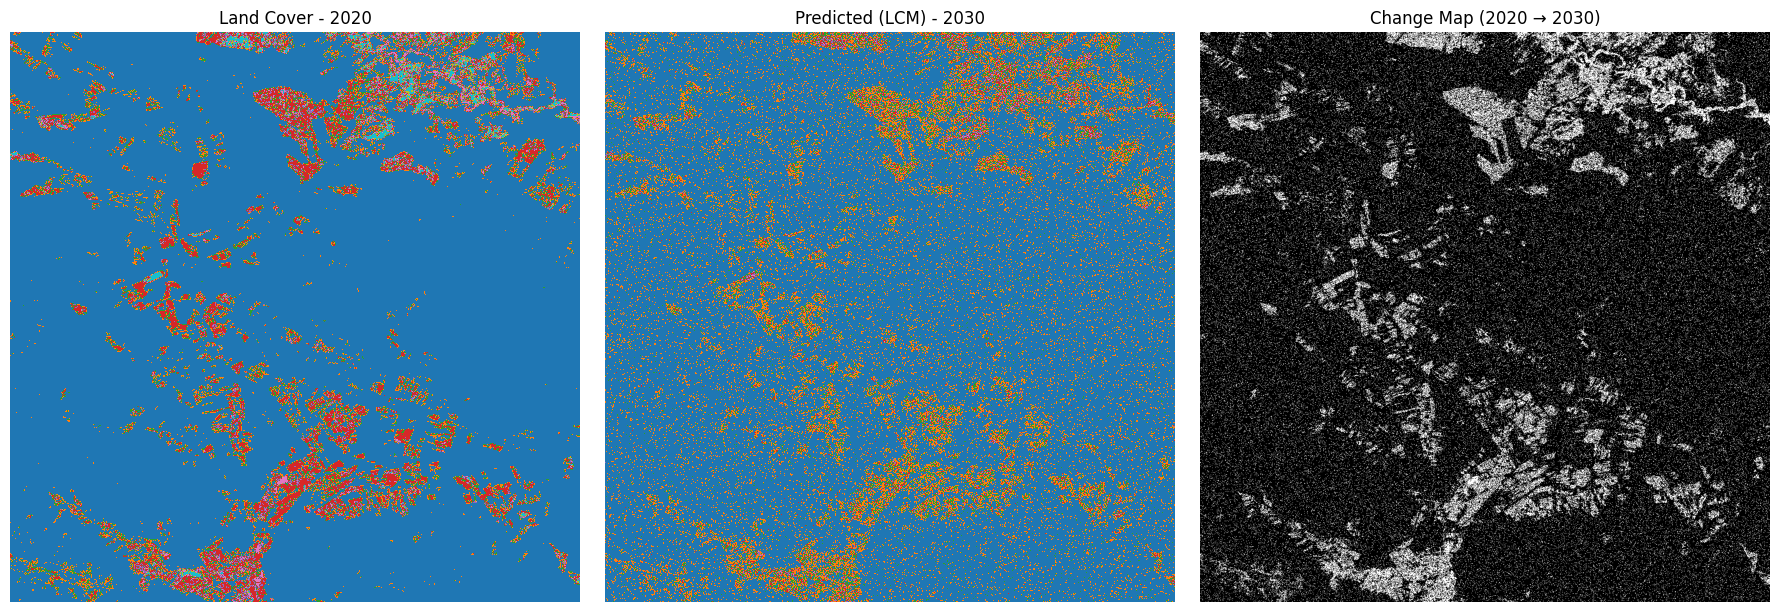

In [18]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.metrics import confusion_matrix

# ---------------------------
# تنظیمات
# ---------------------------
base_path = r"E:\master_1\Msc_4032\spatial_processing\TA\AGIS_HW04_sarhadifaraz_spring2025\classified"
years = [2000, 2020]  # فقط دو سال برای LCM
classes = [0, 1, 2, 3]
class_names = ["Urban", "Vegetation", "Agriculture", "Forest"]
class_colors = ["gray", "green", "gold", "darkgreen"]

# ---------------------------
# بارگذاری دو نقشه LCM
# ---------------------------
rasters = {}
nodatas = {}

for year in years:
    path = os.path.join(base_path, f"classified{year}.tif")
    with rasterio.open(path) as src:
        rasters[year] = src.read(1)
        nodatas[year] = src.nodata
        if year == 2020:
            meta = src.meta.copy()

# ---------------------------
# ساخت ماتریس گذار LCM
# ---------------------------
early = rasters[2000]
late = rasters[2020]
mask = (early != nodatas[2000]) & (late != nodatas[2020])
early_flat = early[mask].flatten()
late_flat = late[mask].flatten()

trans_matrix = confusion_matrix(early_flat, late_flat, labels=classes)
trans_prob = trans_matrix.astype(float) / trans_matrix.sum(axis=1, keepdims=True)

# ---------------------------
# شبیه‌سازی نقشه 2030 با مدل LCM
# ---------------------------
np.random.seed(42)
map_2020 = rasters[2020]
rows, cols = map_2020.shape
map_2030 = np.zeros_like(map_2020, dtype=np.uint8)

for i in range(rows):
    for j in range(cols):
        c = map_2020[i, j]
        if c in classes:
            map_2030[i, j] = np.random.choice(classes, p=trans_prob[c])
        else:
            map_2030[i, j] = 255  # nodata

# ---------------------------
# ذخیره نقشه پیش‌بینی‌شده 2030 (LCM)
# ---------------------------
meta.update({"dtype": "uint8", "count": 1})
out_path = os.path.join(base_path, "classified2030_LCM.tif")

with rasterio.open(out_path, "w", **meta) as dst:
    dst.write(map_2030, 1)

# ---------------------------
# تحلیل آماری و بصری تغییرات (2020 vs 2030)
# ---------------------------
def class_stats(data, classes):
    unique, counts = np.unique(data, return_counts=True)
    stats = dict(zip(unique, counts))
    return [stats.get(c, 0) for c in classes]

c_2020 = class_stats(map_2020, classes)
c_2030 = class_stats(map_2030, classes)
change_map = np.where(map_2020 != map_2030, 1, 0)
changed_pixels = np.sum(change_map)
total_pixels = map_2020.size

df = pd.DataFrame({
    "Class": class_names,
    "Pixels_2020": c_2020,
    "Pixels_2030": c_2030,
    "Change (%)": [((c_2030[i] - c_2020[i]) / c_2020[i] * 100 if c_2020[i] else 0) for i in range(len(classes))]
})
print("\n📊 Change Statistics (LCM 2020 → 2030):\n")
print(df)
print(f"\n🌀 Total changed pixels: {changed_pixels} ({(changed_pixels / total_pixels) * 100:.2f}%)")

# ---------------------------
# رسم نقشه‌ها و تغییرات
# ---------------------------
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(map_2020, cmap="tab10")
axs[0].set_title("Land Cover - 2020")
axs[0].axis("off")

axs[1].imshow(map_2030, cmap="tab10")
axs[1].set_title("Predicted (LCM) - 2030")
axs[1].axis("off")

axs[2].imshow(change_map, cmap="gray")
axs[2].set_title("Change Map (2020 → 2030)")
axs[2].axis("off")

plt.tight_layout()
plt.show()
